In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
ukb_pheno_dict = {
    'p48': 'WAIST',
    'p50': 'HEIGHT',
    'p102': 'PULSE',
    'p4079': 'DBP',
    'p4080': 'SBP',
    'p20116': 'SMOKE',
    'p20117': 'DRINK',
    'p21001': 'BMI',
    # 'p21002': 'WEIGHT',
    'p30000': 'WBC',
    'p30010': 'RBC',
    'p30020': 'Hb',
    'p30080': 'PLT',
    'p30120': 'LYMPH',
    'p30130': 'MONO',
    'p30140': 'NEUT',
    'p30150': 'EOS',
    'p30620': 'ALT',
    'p30650': 'AST',
    'p30670': 'BUN',
    'p30690': 'CHOL',
    'p30700': 'CRE',
    'p30730': 'GGT',
    'p30740': 'GLUC',
    'p30760': 'HDL',
    'p30780': 'LDL',
    'p30870': 'TRIG',
    'p30880': 'UA'
}

In [22]:
def get_median_and_ci(series):
    median = series.median()
    ci_lower = series.quantile(0.025)
    ci_upper = series.quantile(0.975)
    return median, ci_lower, ci_upper

tlprs_res_1 = pd.read_csv("../../../PRS_benchmark/data/result/real_data/tlprs/prs_continuous_metrics.csv")
# display(tlprs_res_1)

# Define the columns for the result DataFrame
res_columns = [
    'trait',
    'r2_incremental_median', 'r2_incremental_CI_lower', 'r2_incremental_CI_upper',
    'r2_full_median', 'r2_full_CI_lower', 'r2_full_CI_upper',
    'rmse_median', 'rmse_CI_lower', 'rmse_CI_upper',
    'nrmse_mean_median', 'nrmse_mean_CI_lower', 'nrmse_mean_CI_upper',
    'nrmse_range_median', 'nrmse_range_CI_lower', 'nrmse_range_CI_upper',
    'nrmse_std_median', 'nrmse_std_CI_lower', 'nrmse_std_CI_upper',
    'pearson_r_median', 'pearson_r_CI_lower', 'pearson_r_CI_upper',
    'top_quintile_mean_median', 'top_quintile_mean_CI_lower', 'top_quintile_mean_CI_upper',
    'bottom_quintile_mean_median', 'bottom_quintile_mean_CI_lower', 'bottom_quintile_mean_CI_upper'
]
res_df = pd.DataFrame(columns=res_columns)

labels = [
    'r2_incremental', 'r2_full', 'rmse', 'nrmse_mean', 'nrmse_range', 'nrmse_std',
    'pearson_r', 'top_quintile_mean', 'bottom_quintile_mean'
]

for trait in tlprs_res_1['trait'].unique():
    temp_df = tlprs_res_1[tlprs_res_1['trait'] == trait]
    row = {'trait': trait.replace("_int", "").replace("_raw", "")}
    for label in labels:
        median, ci_lower, ci_upper = get_median_and_ci(temp_df[label])
        row[f"{label}_median"] = median
        row[f"{label}_CI_lower"] = ci_lower
        row[f"{label}_CI_upper"] = ci_upper
    res_df = pd.concat([res_df, pd.DataFrame([row])], ignore_index=True)

# make sure all column are numeric
for col in res_df.columns:
    if col != 'trait':
        res_df[col] = pd.to_numeric(res_df[col], errors='coerce')
tlprs_res_1 = res_df

C:\Users\nancyli\AppData\Local\Temp\ipykernel_12800\2239132737.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame([row])], ignore_index=True)


In [23]:
def get_median_and_ci(series):
    median = series.median()
    ci_lower = series.quantile(0.025)
    ci_upper = series.quantile(0.975)
    return median, ci_lower, ci_upper

prosper_res_1 = pd.read_csv("../../../PRS_benchmark/data/result/real_data/prosper/prs_continuous_metrics.csv")
# display(prosper_res_1)

# Define the columns for the result DataFrame
res_columns = [
    'trait',
    'r2_incremental_median', 'r2_incremental_CI_lower', 'r2_incremental_CI_upper',
    'r2_full_median', 'r2_full_CI_lower', 'r2_full_CI_upper',
    'rmse_median', 'rmse_CI_lower', 'rmse_CI_upper',
    'nrmse_mean_median', 'nrmse_mean_CI_lower', 'nrmse_mean_CI_upper',
    'nrmse_range_median', 'nrmse_range_CI_lower', 'nrmse_range_CI_upper',
    'nrmse_std_median', 'nrmse_std_CI_lower', 'nrmse_std_CI_upper',
    'pearson_r_median', 'pearson_r_CI_lower', 'pearson_r_CI_upper',
    'top_quintile_mean_median', 'top_quintile_mean_CI_lower', 'top_quintile_mean_CI_upper',
    'bottom_quintile_mean_median', 'bottom_quintile_mean_CI_lower', 'bottom_quintile_mean_CI_upper'
]
res_df = pd.DataFrame(columns=res_columns)

labels = [
    'r2_incremental', 'r2_full', 'rmse', 'nrmse_mean', 'nrmse_range', 'nrmse_std',
    'pearson_r', 'top_quintile_mean', 'bottom_quintile_mean'
]

for trait in prosper_res_1['trait'].unique():
    temp_df = prosper_res_1[prosper_res_1['trait'] == trait]
    row = {'trait': trait.replace("_int", "").replace("_raw", "")}
    for label in labels:
        median, ci_lower, ci_upper = get_median_and_ci(temp_df[label])
        row[f"{label}_median"] = median
        row[f"{label}_CI_lower"] = ci_lower
        row[f"{label}_CI_upper"] = ci_upper
    res_df = pd.concat([res_df, pd.DataFrame([row])], ignore_index=True)

# make sure all column are numeric
for col in res_df.columns:
    if col != 'trait':
        res_df[col] = pd.to_numeric(res_df[col], errors='coerce')
prosper_res_1 = res_df

C:\Users\nancyli\AppData\Local\Temp\ipykernel_12800\2248521493.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame([row])], ignore_index=True)


In [24]:
def get_median_and_ci(series):
    median = series.median()
    ci_lower = series.quantile(0.025)
    ci_upper = series.quantile(0.975)
    return median, ci_lower, ci_upper

ctsleb_res_1 = pd.read_csv("../../../PRS_benchmark/data/result/real_data/ctsleb/prs_continuous_metrics.csv")

# Define the columns for the result DataFrame
res_columns = [
    'trait',
    'r2_incremental_median', 'r2_incremental_CI_lower', 'r2_incremental_CI_upper',
    'r2_full_median', 'r2_full_CI_lower', 'r2_full_CI_upper',
    'rmse_median', 'rmse_CI_lower', 'rmse_CI_upper',
    'nrmse_mean_median', 'nrmse_mean_CI_lower', 'nrmse_mean_CI_upper',
    'nrmse_range_median', 'nrmse_range_CI_lower', 'nrmse_range_CI_upper',
    'nrmse_std_median', 'nrmse_std_CI_lower', 'nrmse_std_CI_upper',
    'pearson_r_median', 'pearson_r_CI_lower', 'pearson_r_CI_upper',
    'top_quintile_mean_median', 'top_quintile_mean_CI_lower', 'top_quintile_mean_CI_upper',
    'bottom_quintile_mean_median', 'bottom_quintile_mean_CI_lower', 'bottom_quintile_mean_CI_upper'
]
res_df = pd.DataFrame(columns=res_columns)

labels = [
    'r2_incremental', 'r2_full', 'rmse', 'nrmse_mean', 'nrmse_range', 'nrmse_std',
    'pearson_r', 'top_quintile_mean', 'bottom_quintile_mean'
]

for trait in ctsleb_res_1['trait'].unique():
    temp_df = ctsleb_res_1[ctsleb_res_1['trait'] == trait]
    row = {'trait': trait.replace("_int", "").replace("_raw", "")}
    for label in labels:
        median, ci_lower, ci_upper = get_median_and_ci(temp_df[label])
        row[f"{label}_median"] = median
        row[f"{label}_CI_lower"] = ci_lower
        row[f"{label}_CI_upper"] = ci_upper
    res_df = pd.concat([res_df, pd.DataFrame([row])], ignore_index=True)

# make sure all column are numeric
for col in res_df.columns:
    if col != 'trait':
        res_df[col] = pd.to_numeric(res_df[col], errors='coerce')
ctsleb_res_1 = res_df

C:\Users\nancyli\AppData\Local\Temp\ipykernel_12800\2233900986.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame([row])], ignore_index=True)


In [25]:
def get_median_and_ci(series):
    median = series.median()
    ci_lower = series.quantile(0.025)
    ci_upper = series.quantile(0.975)
    return median, ci_lower, ci_upper

lasso_res_1 = pd.read_csv("../../../PRS_benchmark/data/result/real_data/lassosum/EAS_metrics_with_ci.csv")
# display(lasso_res_1)

# Define the columns for the result DataFrame
res_columns = [
    'trait',
    'r2_incremental_median', 'r2_incremental_CI_lower', 'r2_incremental_CI_upper',
    'r2_full_median', 'r2_full_CI_lower', 'r2_full_CI_upper',
    'rmse_median', 'rmse_CI_lower', 'rmse_CI_upper',
    'nrmse_mean_median', 'nrmse_mean_CI_lower', 'nrmse_mean_CI_upper',
    'nrmse_range_median', 'nrmse_range_CI_lower', 'nrmse_range_CI_upper',
    'nrmse_std_median', 'nrmse_std_CI_lower', 'nrmse_std_CI_upper',
    'pearson_r_median', 'pearson_r_CI_lower', 'pearson_r_CI_upper',
    'top_quintile_mean_median', 'top_quintile_mean_CI_lower', 'top_quintile_mean_CI_upper',
    'bottom_quintile_mean_median', 'bottom_quintile_mean_CI_lower', 'bottom_quintile_mean_CI_upper'
]
res_df = pd.DataFrame(columns=res_columns)

labels = [
    'r2_incremental', 'r2_full', 'rmse', 'nrmse_mean', 'nrmse_range', 'nrmse_std',
    'pearson_r', 'top_quintile_mean', 'bottom_quintile_mean'
]

for trait in lasso_res_1['trait'].unique():
    temp_df = lasso_res_1[lasso_res_1['trait'] == trait]
    row = {'trait': trait.replace("_int", "").replace("_raw", "")}
    for label in labels:
        median, ci_lower, ci_upper = get_median_and_ci(temp_df[label])
        row[f"{label}_median"] = median
        row[f"{label}_CI_lower"] = ci_lower
        row[f"{label}_CI_upper"] = ci_upper
    res_df = pd.concat([res_df, pd.DataFrame([row])], ignore_index=True)

# make sure all column are numeric
for col in res_df.columns:
    if col != 'trait':
        res_df[col] = pd.to_numeric(res_df[col], errors='coerce')
lasso_res_1 = res_df

C:\Users\nancyli\AppData\Local\Temp\ipykernel_12800\3952015162.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame([row])], ignore_index=True)


In [26]:
prscsx_res_1 = pd.read_csv("../../../PRS_benchmark/data/result/real_data/prscsx/prs_continuous_metrics_with_ci.csv")
xpass_res_1 = pd.read_csv("../../../PRS_benchmark/data/result/real_data/xpass/prs_continuous_metrics_with_ci.csv")
sdprx_res_1 = pd.read_csv("../../../PRS_benchmark/data/result/real_data/sdprx/prs_continuous_metrics_with_ci.csv")
polypred_res_1 = pd.read_csv("../../../PRS_benchmark/data/result/real_data/polypred/prs_continuous_metrics_with_ci.csv")
ct_res_1 = pd.read_csv("../../../PRS_benchmark/data/result/real_data/ct/EAS_out_sample_metrics_with_ci.csv")
ct_res_2 = pd.read_csv("../../../PRS_benchmark/data/result/real_data/ct/EUR_out_sample_metrics_with_ci.csv")
category_map = pd.read_csv("category_map.tsv", sep='\t')
category_map = category_map.rename(columns={"short_name": "pheno"})

prscsx_res_1["method"] = "PRS-CSx"
xpass_res_1["method"] = "XPASS"
sdprx_res_1["method"] = "SDPRX"
tlprs_res_1["method"] = "TLPRS"
polypred_res_1["method"] = "PolyPred"
ctsleb_res_1["method"] = "CTSLEB"
prosper_res_1["method"] = "PROSPER"
ct_res_1["method"] = "CT (EAS)"
lasso_res_1["method"] = "Lassosum2 (EAS)"
ct_res_2["method"] = "CT (EUR)"

merge_res = pd.concat([prscsx_res_1, xpass_res_1, sdprx_res_1, tlprs_res_1, polypred_res_1, ctsleb_res_1, prosper_res_1, ct_res_1, lasso_res_1, ct_res_2], ignore_index=True)
merge_res["trait"] = merge_res["trait"].apply(lambda x: x.replace("_int", "").replace("_raw", ""))
merge_res["pheno"] = merge_res["trait"].apply(lambda x: ukb_pheno_dict.get(x, x))
# Merge with category map to get phenotype names
merge_res = merge_res.merge(category_map, on="pheno", how="left")
# sort by phenotype
merge_res = merge_res.sort_values(by=["category","pheno"])
merge_res = merge_res.dropna(subset=["category"])
display(merge_res)
print(merge_res.columns)

,r2_incremental_median,r2_incremental_CI_lower,r2_incremental_CI_upper,r2_full_median,r2_full_CI_lower,r2_full_CI_upper,rmse_median,rmse_CI_lower,rmse_CI_upper,nrmse_mean_median,...,top_quintile_mean_median,top_quintile_mean_CI_lower,top_quintile_mean_CI_upper,bottom_quintile_mean_median,bottom_quintile_mean_CI_lower,bottom_quintile_mean_CI_upper,trait,method,pheno,category
8,0.006303,9.941322e-04,0.016568,0.098602,0.071907,0.128952,14.053111,12.199964,16.396028,0.610265,...,20.944397,19.549971,22.405310,24.681701,23.016668,26.669045,p30620,PRS-CSx,ALT,Blood biochemistry
34,0.012593,4.561136e-03,0.024348,0.104342,0.077269,0.134742,13.975426,12.211853,16.226582,0.607143,...,26.193345,23.980200,28.755279,20.297123,19.084535,21.601608,p30620,XPASS,ALT,Blood biochemistry
60,0.012123,3.681204e-03,0.025064,0.105502,0.078416,0.134776,14.016002,12.264350,16.181486,0.607698,...,25.988424,23.862249,28.388204,21.557263,20.275368,23.030015,p30620,SDPRX,ALT,Blood biochemistry
92,0.010290,2.457665e-03,0.014747,0.094930,0.087097,0.099386,14.135488,14.100643,14.196520,0.613870,...,25.651338,23.714411,26.300030,20.993895,20.524342,21.918017,p30620,TLPRS,ALT,Blood biochemistry
117,0.017269,8.247666e-03,0.030479,0.110420,0.085177,0.139716,13.927090,12.122261,15.860693,0.605165,...,25.703834,23.812837,28.037441,20.619409,19.384517,22.077373,p30620,PolyPred,ALT,Blood biochemistry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.000617,1.110223e-16,0.005730,0.295470,0.294853,0.300583,8.702135,8.670502,8.705947,0.108095,...,80.814548,80.279457,81.954599,79.884281,79.181313,80.506714,p48,CTSLEB,WAIST,Body size measures
153,0.000341,2.659508e-06,0.002906,0.295194,0.294855,0.297758,8.703843,8.687989,8.705931,0.108116,...,80.809866,80.141480,81.955226,80.183110,79.417517,81.141806,p48,PROSPER,WAIST,Body size measures
178,0.001191,7.942313e-06,0.005962,0.303135,0.263579,0.341589,8.652680,8.271192,9.036083,0.107452,...,81.095478,79.860624,82.361696,80.054430,78.930936,81.204025,p48,CT (EAS),WAIST,Body size measures
205,0.000178,3.710050e-06,0.000840,0.295031,0.294856,0.295693,8.704849,8.700758,8.705925,0.108128,...,80.432943,79.635744,80.997659,80.247324,79.344172,80.769925,p48,Lassosum2 (EAS),WAIST,Body size measures


Index(['r2_incremental_median', 'r2_incremental_CI_lower',
       'r2_incremental_CI_upper', 'r2_full_median', 'r2_full_CI_lower',
       'r2_full_CI_upper', 'rmse_median', 'rmse_CI_lower', 'rmse_CI_upper',
       'nrmse_mean_median', 'nrmse_mean_CI_lower', 'nrmse_mean_CI_upper',
       'nrmse_range_median', 'nrmse_range_CI_lower', 'nrmse_range_CI_upper',
       'nrmse_std_median', 'nrmse_std_CI_lower', 'nrmse_std_CI_upper',
       'pearson_r_median', 'pearson_r_CI_lower', 'pearson_r_CI_upper',
       'top_quintile_mean_median', 'top_quintile_mean_CI_lower',
       'top_quintile_mean_CI_upper', 'bottom_quintile_mean_median',
       'bottom_quintile_mean_CI_lower', 'bottom_quintile_mean_CI_upper',
       'trait', 'method', 'pheno', 'category'],
      dtype='object')


--- 用于绘图的模拟数据 ---
     r2_incremental_median  r2_incremental_CI_lower  r2_incremental_CI_upper  \
8                 0.006303                 0.000994                 0.016568   
34                0.012593                 0.004561                 0.024348   
60                0.012123                 0.003681                 0.025064   
92                0.010290                 0.002458                 0.014747   
110               0.017857                 0.008352                 0.030499   

     r2_full_median  r2_full_CI_lower  r2_full_CI_upper  rmse_median  \
8          0.098602          0.071907          0.128952    14.053111   
34         0.104342          0.077269          0.134742    13.975426   
60         0.105502          0.078416          0.134776    14.016002   
92         0.094930          0.087097          0.099386    14.135488   
110        0.109334          0.084528          0.139608    13.890804   

     rmse_CI_lower  rmse_CI_upper  nrmse_mean_median  ...  \
8      

g:\lishuhua\software\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
g:\lishuhua\software\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


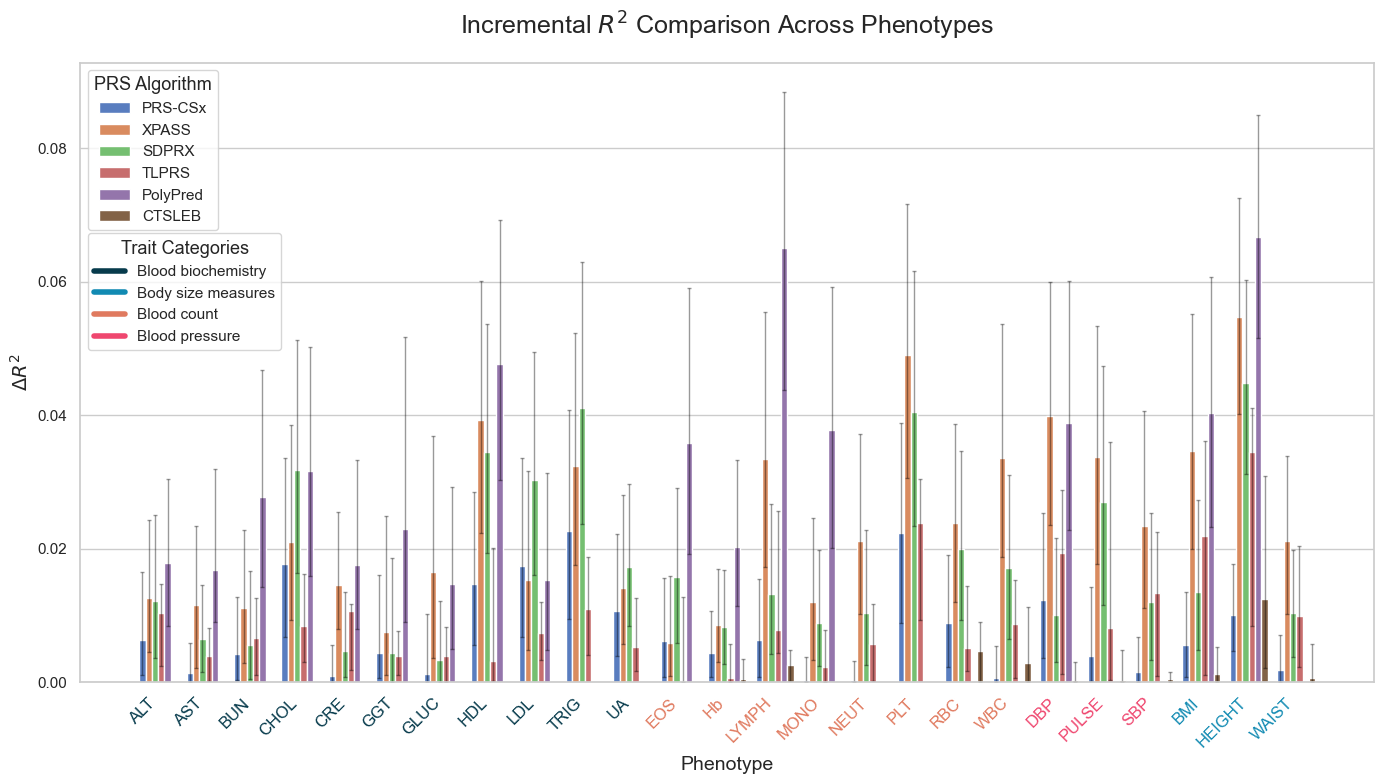

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# --- 1. 准备数据 ---
# 在您的实际应用中，您会从一个文件中加载计算好的结果
# 例如: df = pd.read_csv('my_prs_results.csv')
#
# 为了演示，我们这里创建一个模拟的DataFrame。
# 您的真实数据应该整理成下面这种“长格式”。

print("--- 用于绘图的模拟数据 ---")
print(merge_res.head())


# --- 2. 开始绘图 ---

# 设置绘图风格和字体，确保中文能够正确显示
sns.set_style("whitegrid")
# plt.rcParams['font.sans-serif'] = ['SimHei'] # 'SimHei' 是常用的黑体
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# 创建一个图形和坐标轴，设置合适的尺寸
fig, ax = plt.subplots(figsize=(14, 8))

# 使用seaborn绘制分组柱状图
# x: x轴类别 (表型)
# y: y轴数值 (增量R²)
# hue: 分组的类别 (方法)
# data: 输入的DataFrame
barplot = sns.barplot(
    x='pheno',
    y='r2_incremental_median',
    hue='method',
    data=merge_res,
    # palette='viridis', # 'viridis', 'muted', 'colorblind' 都是不错的色板
    palette='muted',
    ax=ax,
    # Seaborn 1.12.0+ 支持直接传入误差数据，但手动添加更灵活
    errorbar=None, # 关闭默认的误差棒
)

# --- 核心修正 ---
# 2. 创建一个临时的、干净的DataFrame，专门用于匹配和绘图
# 这个DataFrame的行数会和ax.patches的数量完全一致
plot_data = merge_res[['pheno', 'method', 'r2_incremental_median', 'r2_incremental_CI_lower', 'r2_incremental_CI_upper']].dropna(subset=['r2_incremental_median']).copy()
plot_data['err_lower'] = plot_data['r2_incremental_median'] - plot_data['r2_incremental_CI_lower']
plot_data['err_upper'] = plot_data['r2_incremental_CI_upper'] - plot_data['r2_incremental_median']

# 3. 排序这个临时DataFrame以匹配seaborn的绘图顺序
x_order = [tick.get_text() for tick in ax.get_xticklabels()]
hue_order = [t.get_text() for t in ax.get_legend().get_texts()]

for x in x_order:
    for hue in hue_order:
        if not ((plot_data['pheno'] == x) & (plot_data['method'] == hue)).any():
            # 如果没有对应的行，添加一个空行
            plot_data = pd.concat([plot_data, pd.DataFrame({'pheno': [x], 'method': [hue], 'r2_incremental_median': [np.nan], 'r2_incremental_CI_lower': [np.nan], 'r2_incremental_CI_upper': [np.nan], 'err_lower': [np.nan], 'err_upper': [np.nan]})], ignore_index=True)

plot_data['pheno'] = pd.Categorical(plot_data['pheno'], categories=x_order, ordered=True)
plot_data['method'] = pd.Categorical(plot_data['method'], categories=hue_order, ordered=True)
sorted_plot_data = plot_data.sort_values(by=['method', 'pheno'])
print(sorted_plot_data.shape)
print(len(ax.patches), len(sorted_plot_data))

# 4. 现在zip是绝对安全的，因为len(ax.patches) == len(sorted_plot_data)
for patch, (idx, row) in zip(ax.patches, sorted_plot_data.iterrows()):
    x_center = patch.get_x() + patch.get_width() / 2
    y_top = patch.get_height()
    err = np.array([[row['err_lower']], [row['err_upper']]])

    ax.errorbar(x=x_center, y=y_top, yerr=err,
    fmt='none', c='black', capsize=1.5, elinewidth=1, alpha=0.4)

# --- 4. 美化与调整 ---

# 设置x轴的标签旋转角度，避免重叠
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 对于不同的category，对x轴标签进行分组显示
# 这里假设您的DataFrame中有一个'category'列来区分不同
# 根据分组标签改变Y轴标签的颜色
for label in ax.get_xticklabels():
    trait_name = label.get_text()
    # 根据类别设置标签颜色
    category = merge_res.loc[merge_res['pheno'] == trait_name, 'category'].values[0]
    label.set_color('#073B4C' if category == 'Blood biochemistry' else '#118AB2' if category == 'Body size measures' else '#E07A5F' if category == "Blood count" else "#EF476F" if category == "Blood pressure" else "#06D6A0")

legend_elements = [
    Line2D([0], [0], color='#073B4C', lw=4, label='Blood biochemistry'),
    Line2D([0], [0], color='#118AB2', lw=4, label='Body size measures'),
    Line2D([0], [0], color='#E07A5F', lw=4, label='Blood count'),
    Line2D([0], [0], color='#EF476F', lw=4, label='Blood pressure'),
]
ax.add_artist(ax.legend(handles=legend_elements, loc='center left', fontsize=11, title='Trait Categories', title_fontsize='13', bbox_to_anchor=(0, 0.63)))
# 设置Y轴的格式，转为百分比显示更直观
# ax.set_yticklabels([f'{y*100:.1f}%' for y in ax.get_yticks()])


ax.set_title(r'Incremental $R^2$ Comparison Across Phenotypes', fontsize=18, pad=20)
ax.set_xlabel('Phenotype', fontsize=14)
ax.set_ylabel(r'$\Delta R^2$', fontsize=14)

# set y-axis label at the center


# # 调整图例
# # 再加一张图例，显示不同的PRS算法
# legend_elements = [
#     Line2D([0], [0], color='blue', lw=4, label='PRS-CSx'),
#     Line2D([0], [0], color='orange', lw=4, label='XPASS'),
# ]
# ax.legend(handles=legend_elements, title='PRS Algorithm', fontsize=11, title_fontsize='13')
ax.legend(title='PRS Algorithm', title_fontsize='13', fontsize='11', loc='upper left')

# 调整坐标轴刻度标签的字体大小
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=11)

# 确保布局紧凑
plt.tight_layout()

# 保存图形（可选）
# plt.savefig('incremental_r2_comparison.png', dpi=300)

# 显示图形
plt.show()

--- 用于绘图的模拟数据 ---
     r2_incremental_median  r2_incremental_CI_lower  r2_incremental_CI_upper  \
8                 0.006303                 0.000994                 0.016568   
34                0.012593                 0.004561                 0.024348   
60                0.012123                 0.003681                 0.025064   
92                0.010290                 0.002458                 0.014747   
107               0.017945                 0.007691                 0.031145   

     r2_full_median  r2_full_CI_lower  r2_full_CI_upper  rmse_median  \
8          0.098602          0.071907          0.128952    14.053111   
34         0.104342          0.077269          0.134742    13.975426   
60         0.105502          0.078416          0.134776    14.016002   
92         0.094930          0.087097          0.099386    14.135488   
107        0.108714          0.082848          0.138980    13.926946   

     rmse_CI_lower  rmse_CI_upper  nrmse_mean_median  ...  \
8      

g:\lishuhua\software\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
g:\lishuhua\software\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


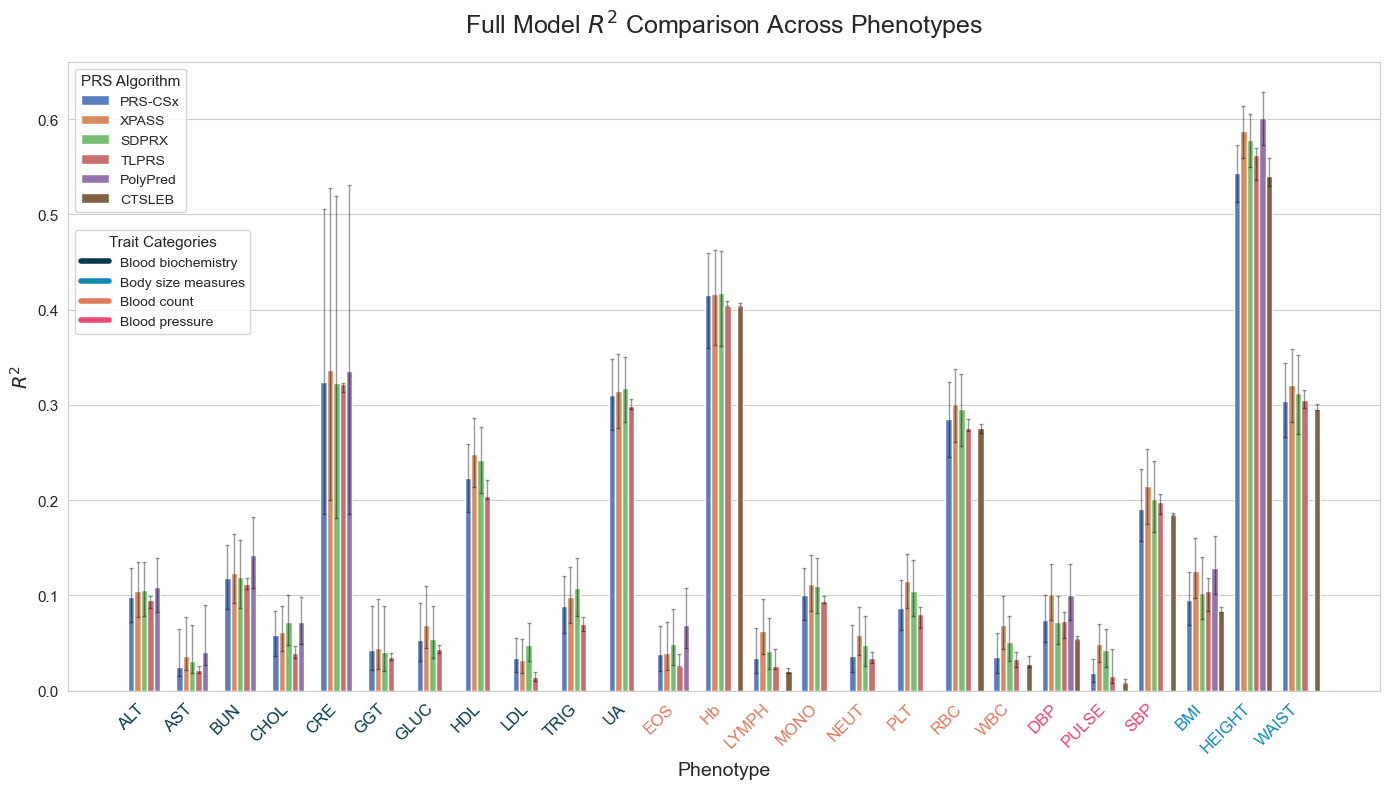

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# --- 1. 准备数据 ---
# 在您的实际应用中，您会从一个文件中加载计算好的结果
# 例如: df = pd.read_csv('my_prs_results.csv')
#
# 为了演示，我们这里创建一个模拟的DataFrame。
# 您的真实数据应该整理成下面这种“长格式”。

print("--- 用于绘图的模拟数据 ---")
print(merge_res.head())

# --- 2. 开始绘图 ---

# 设置绘图风格和字体，确保中文能够正确显示
sns.set_style("whitegrid")
# plt.rcParams['font.sans-serif'] = ['SimHei'] # 'SimHei' 是常用的黑体
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# 创建一个图形和坐标轴，设置合适的尺寸
fig, ax = plt.subplots(figsize=(14, 8))

# 使用seaborn绘制分组柱状图
# x: x轴类别 (表型)
# y: y轴数值 (增量R²)
# hue: 分组的类别 (方法)
# data: 输入的DataFrame
barplot = sns.barplot(
    x='pheno',
    y='r2_full_median',
    hue='method',
    data=merge_res,
    palette='muted',  # 'viridis', 'muted', 'colorblind' 都是不错的色板
    ax=ax,
    errorbar=None  # 不直接传递误差棒
)

# --- 核心修正 ---
# 2. 创建一个临时的、干净的DataFrame，专门用于匹配和绘图
# 这个DataFrame的行数会和ax.patches的数量完全一致
plot_data = merge_res[['pheno', 'method', 'r2_full_median', 'r2_full_CI_lower', 'r2_full_CI_upper']].dropna(subset=['r2_full_median']).copy()
plot_data['err_lower'] = plot_data['r2_full_median'] - plot_data['r2_full_CI_lower']
plot_data['err_upper'] = plot_data['r2_full_CI_upper'] - plot_data['r2_full_median']

# 3. 排序这个临时DataFrame以匹配seaborn的绘图顺序
x_order = [tick.get_text() for tick in ax.get_xticklabels()]
hue_order = [t.get_text() for t in ax.get_legend().get_texts()]

for x in x_order:
    for hue in hue_order:
        if not ((plot_data['pheno'] == x) & (plot_data['method'] == hue)).any():
            # 如果没有对应的行，添加一个空行
            plot_data = pd.concat([plot_data, pd.DataFrame({'pheno': [x], 'method': [hue], 'r2_full_median': [np.nan], 'r2_full_CI_lower': [np.nan], 'r2_full_CI_upper': [np.nan], 'err_lower': [np.nan], 'err_upper': [np.nan]})], ignore_index=True)

plot_data['pheno'] = pd.Categorical(plot_data['pheno'], categories=x_order, ordered=True)
plot_data['method'] = pd.Categorical(plot_data['method'], categories=hue_order, ordered=True)
sorted_plot_data = plot_data.sort_values(by=['method', 'pheno'])
print(sorted_plot_data.shape)
print(len(ax.patches), len(sorted_plot_data))

# 4. 现在zip是绝对安全的，因为len(ax.patches) == len(sorted_plot_data)
for patch, (idx, row) in zip(ax.patches, sorted_plot_data.iterrows()):
    x_center = patch.get_x() + patch.get_width() / 2
    y_top = patch.get_height()
    err = np.array([[row['err_lower']], [row['err_upper']]])

    ax.errorbar(x=x_center, y=y_top, yerr=err,
    fmt='none', c='black', capsize=1.5, elinewidth=1, alpha=0.4)

# --- 4. 美化与调整 ---

# 设置x轴的标签旋转角度，避免重叠
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 对于不同的category，对x轴标签进行分组显示
# 这里假设您的DataFrame中有一个'category'列来区分不同
# 根据分组标签改变Y轴标签的颜色
for label in ax.get_xticklabels():
    trait_name = label.get_text()
    # 根据类别设置标签颜色
    category = merge_res.loc[merge_res['pheno'] == trait_name, 'category'].values[0]
    label.set_color('#073B4C' if category == 'Blood biochemistry' else '#118AB2' if category == 'Body size measures' else '#E07A5F' if category == "Blood count" else "#EF476F" if category == "Blood pressure" else "#06D6A0")

legend_elements = [
    Line2D([0], [0], color='#073B4C', lw=4, label='Blood biochemistry'),
    Line2D([0], [0], color='#118AB2', lw=4, label='Body size measures'),
    Line2D([0], [0], color='#E07A5F', lw=4, label='Blood count'),
    Line2D([0], [0], color='#EF476F', lw=4, label='Blood pressure'),
]
ax.add_artist(ax.legend(handles=legend_elements, loc='center left', fontsize=10, title='Trait Categories', title_fontsize='11', bbox_to_anchor=(0, 0.65)))
# 设置Y轴的格式，转为百分比显示更直观
# ax.set_yticklabels([f'{y*100:.1f}%' for y in ax.get_yticks()])


ax.set_title(r'Full Model $R^2$ Comparison Across Phenotypes', fontsize=18, pad=20)
ax.set_xlabel('Phenotype', fontsize=14)
ax.set_ylabel(r'$R^2$', fontsize=14)

# # 调整图例
# # 再加一张图例，显示不同的PRS算法
# legend_elements = [
#     Line2D([0], [0], color='blue', lw=4, label='PRS-CSx'),
#     Line2D([0], [0], color='orange', lw=4, label='XPASS'),
# ]
# ax.legend(handles=legend_elements, title='PRS Algorithm', fontsize=11, title_fontsize='13')
ax.legend(title='PRS Algorithm', title_fontsize='11', fontsize='10', loc='upper left')

# 调整坐标轴刻度标签的字体大小
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=11)

# 确保布局紧凑
plt.tight_layout()

# 保存图形（可选）
# plt.savefig('incremental_r2_comparison.png', dpi=300)

# 显示图形
plt.show()

--- 用于绘图的模拟数据 ---
     r2_incremental_median  r2_incremental_CI_lower  r2_incremental_CI_upper  \
8                 0.006303                 0.000994                 0.016568   
34                0.012593                 0.004561                 0.024348   
60                0.012123                 0.003681                 0.025064   
92                0.010290                 0.002458                 0.014747   
106               0.017855                 0.007855                 0.030447   

     r2_full_median  r2_full_CI_lower  r2_full_CI_upper  rmse_median  \
8          0.098602          0.071907          0.128952    14.053111   
34         0.104342          0.077269          0.134742    13.975426   
60         0.105502          0.078416          0.134776    14.016002   
92         0.094930          0.087097          0.099386    14.135488   
106        0.110781          0.084562          0.140891    13.892139   

     rmse_CI_lower  rmse_CI_upper  nrmse_mean_median  ...  \
8      

g:\lishuhua\software\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
g:\lishuhua\software\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


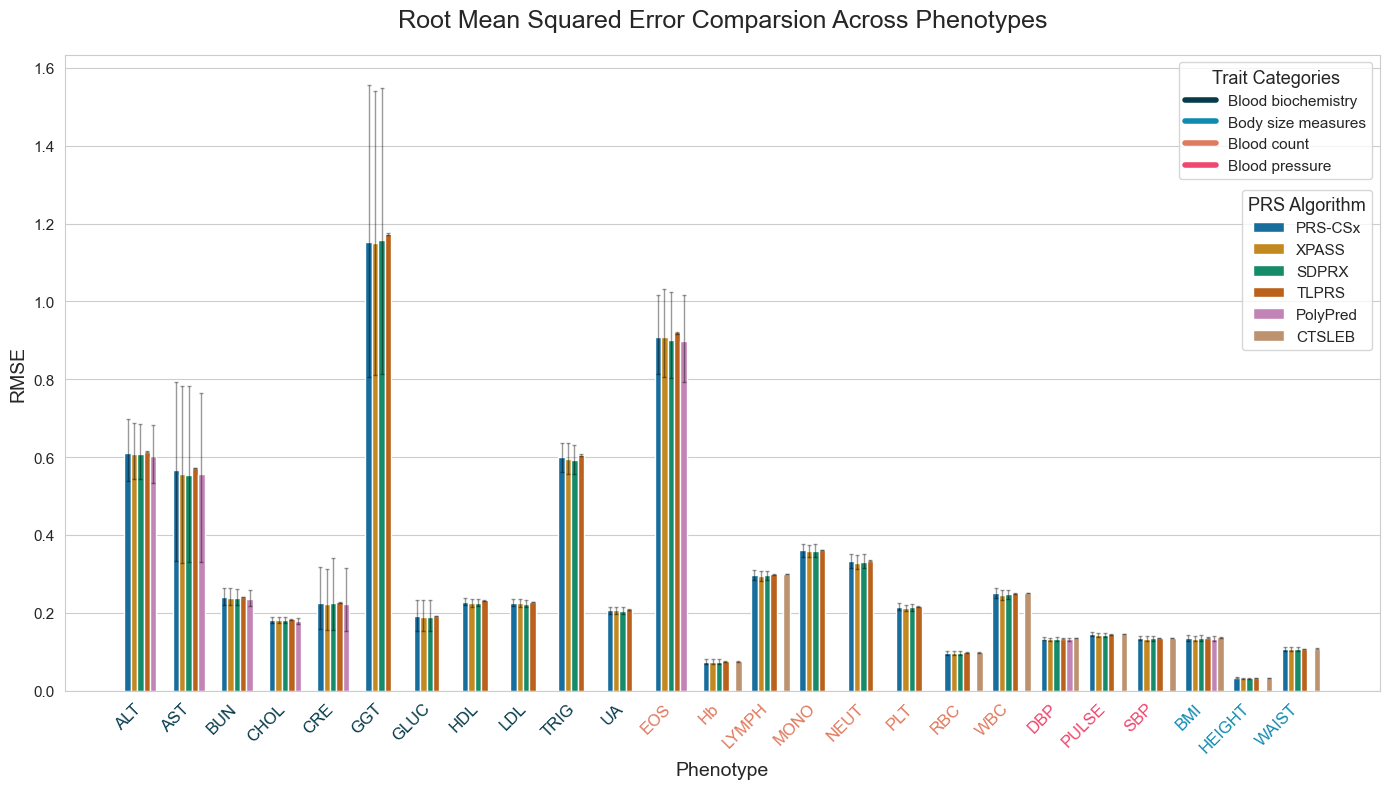

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# --- 1. 准备数据 ---
# 在您的实际应用中，您会从一个文件中加载计算好的结果
# 例如: df = pd.read_csv('my_prs_results.csv')
#
# 为了演示，我们这里创建一个模拟的DataFrame。
# 您的真实数据应该整理成下面这种“长格式”。

print("--- 用于绘图的模拟数据 ---")
print(merge_res.head())


# --- 2. 开始绘图 ---

# 设置绘图风格和字体，确保中文能够正确显示
sns.set_style("whitegrid")
# plt.rcParams['font.sans-serif'] = ['SimHei'] # 'SimHei' 是常用的黑体
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# 创建一个图形和坐标轴，设置合适的尺寸
fig, ax = plt.subplots(figsize=(14, 8))

# 使用seaborn绘制分组柱状图
# x: x轴类别 (表型)
# y: y轴数值 (增量R²)
# hue: 分组的类别 (方法)
# data: 输入的DataFrame
barplot = sns.barplot(
x='pheno',
y='nrmse_mean_median',
hue='method',
data=merge_res,
palette='colorblind', # 'viridis', 'muted', 'colorblind' 都是不错的色板
ax=ax,
# Seaborn 1.12.0+ 支持直接传入误差数据，但手动添加更灵活
# errorbar=None
)

# --- 核心修正 ---
# 2. 创建一个临时的、干净的DataFrame，专门用于匹配和绘图
# 这个DataFrame的行数会和ax.patches的数量完全一致
plot_data = merge_res[['pheno', 'method', 'nrmse_mean_median', 'nrmse_mean_CI_lower', 'nrmse_mean_CI_upper']].dropna(subset=['nrmse_mean_median']).copy()
plot_data['err_lower'] = plot_data['nrmse_mean_median'] - plot_data['nrmse_mean_CI_lower']
plot_data['err_upper'] = plot_data['nrmse_mean_CI_upper'] - plot_data['nrmse_mean_median']

# 3. 排序这个临时DataFrame以匹配seaborn的绘图顺序
x_order = [tick.get_text() for tick in ax.get_xticklabels()]
hue_order = [t.get_text() for t in ax.get_legend().get_texts()]

for x in x_order:
    for hue in hue_order:
        if not ((plot_data['pheno'] == x) & (plot_data['method'] == hue)).any():
            # 如果没有对应的行，添加一个空行
            plot_data = pd.concat([plot_data, pd.DataFrame({'pheno': [x], 'method': [hue], 'nrmse_mean_median': [np.nan], 'nrmse_mean_CI_lower': [np.nan], 'nrmse_mean_CI_upper': [np.nan], 'err_lower': [np.nan], 'err_upper': [np.nan]})], ignore_index=True)

plot_data['pheno'] = pd.Categorical(plot_data['pheno'], categories=x_order, ordered=True)
plot_data['method'] = pd.Categorical(plot_data['method'], categories=hue_order, ordered=True)
sorted_plot_data = plot_data.sort_values(by=['method', 'pheno'])
print(sorted_plot_data.shape)
print(len(ax.patches), len(sorted_plot_data))

# 4. 现在zip是绝对安全的，因为len(ax.patches) == len(sorted_plot_data)
for patch, (idx, row) in zip(ax.patches, sorted_plot_data.iterrows()):
    x_center = patch.get_x() + patch.get_width() / 2
    y_top = patch.get_height()
    err = np.array([[row['err_lower']], [row['err_upper']]])

    ax.errorbar(x=x_center, y=y_top, yerr=err,
    fmt='none', c='black', capsize=1.5, elinewidth=1, alpha=0.4)

# --- 4. 美化与调整 ---

# 设置x轴的标签旋转角度，避免重叠
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 对于不同的category，对x轴标签进行分组显示
# 这里假设您的DataFrame中有一个'category'列来区分不同
# 根据分组标签改变Y轴标签的颜色
for label in ax.get_xticklabels():
    trait_name = label.get_text()
    # 根据类别设置标签颜色
    category = merge_res.loc[merge_res['pheno'] == trait_name, 'category'].values[0]
    label.set_color('#073B4C' if category == 'Blood biochemistry' else '#118AB2' if category == 'Body size measures' else '#E07A5F' if category == "Blood count" else "#EF476F" if category == "Blood pressure" else "#06D6A0")

legend_elements = [
    Line2D([0], [0], color='#073B4C', lw=4, label='Blood biochemistry'),
    Line2D([0], [0], color='#118AB2', lw=4, label='Body size measures'),
    Line2D([0], [0], color='#E07A5F', lw=4, label='Blood count'),
    Line2D([0], [0], color='#EF476F', lw=4, label='Blood pressure'),
]
ax.add_artist(ax.legend(handles=legend_elements, loc='upper right', fontsize=11, title='Trait Categories', title_fontsize='13'))
# 设置Y轴的格式，转为百分比显示更直观
# ax.set_yticklabels([f'{y*100:.1f}%' for y in ax.get_yticks()])


ax.set_title(r'Root Mean Squared Error Comparsion Across Phenotypes', fontsize=18, pad=20)
ax.set_xlabel('Phenotype', fontsize=14)
ax.set_ylabel(r'RMSE', fontsize=14)

# # 调整图例
# # 再加一张图例，显示不同的PRS算法
# legend_elements = [
#     Line2D([0], [0], color='blue', lw=4, label='PRS-CSx'),
#     Line2D([0], [0], color='orange', lw=4, label='XPASS'),
# ]
# ax.legend(handles=legend_elements, title='PRS Algorithm', fontsize=11, title_fontsize='13')
ax.legend(title='PRS Algorithm', title_fontsize='13',loc='upper right', fontsize='11', bbox_to_anchor=(1, 0.80))

# 调整坐标轴刻度标签的字体大小
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=11)

# 确保布局紧凑
plt.tight_layout()

# 保存图形（可选）
# plt.savefig('incremental_r2_comparison.png', dpi=300)

# 显示图形
plt.show()

--- 用于绘图的模拟数据 ---
     r2_incremental_median  r2_incremental_CI_lower  r2_incremental_CI_upper  \
8                 0.006303                 0.000994                 0.016568   
34                0.012593                 0.004561                 0.024348   
60                0.012123                 0.003681                 0.025064   
92                0.010290                 0.002458                 0.014747   
117               0.017269                 0.008248                 0.030479   

     r2_full_median  r2_full_CI_lower  r2_full_CI_upper  rmse_median  \
8          0.098602          0.071907          0.128952    14.053111   
34         0.104342          0.077269          0.134742    13.975426   
60         0.105502          0.078416          0.134776    14.016002   
92         0.094930          0.087097          0.099386    14.135488   
117        0.110420          0.085177          0.139716    13.927090   

     rmse_CI_lower  rmse_CI_upper  nrmse_mean_median  ...  \
8      

C:\Users\nancyli\AppData\Local\Temp\ipykernel_12800\413330821.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ha='center')


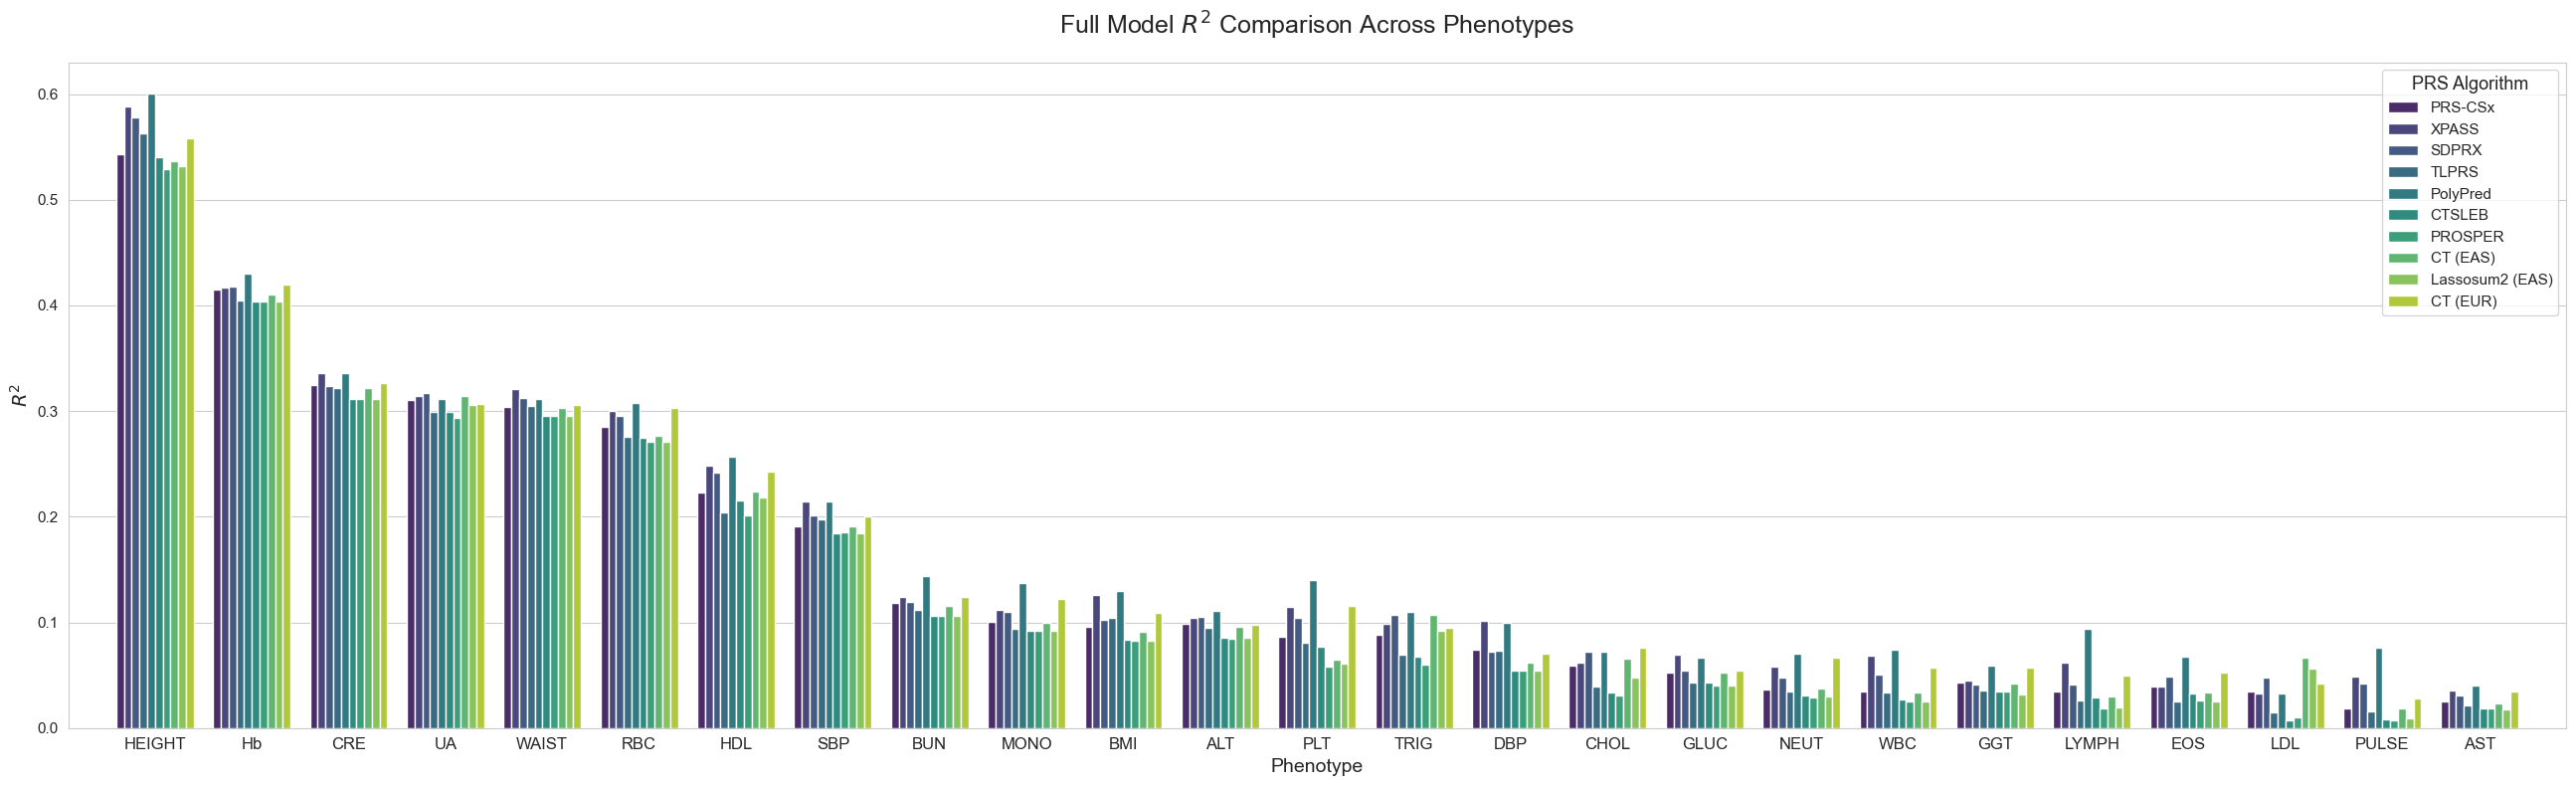

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# --- 1. 准备数据 ---
# 在您的实际应用中，您会从一个文件中加载计算好的结果
# 例如: df = pd.read_csv('my_prs_results.csv')
#
# 为了演示，我们这里创建一个模拟的DataFrame。
# 您的真实数据应该整理成下面这种“长格式”。

print("--- 用于绘图的模拟数据 ---")
print(merge_res.head())

# --- 2. 开始绘图 ---

# 设置绘图风格和字体，确保中文能够正确显示
sns.set_style("whitegrid")
# plt.rcParams['font.sans-serif'] = ['SimHei'] # 'SimHei' 是常用的黑体
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题
bar_width = 0.1

# 创建一个图形和坐标轴，设置合适的尺寸
# 分两行展示
fig, ax = plt.subplots(figsize=(26, 8))


trait_order = merge_res.groupby('pheno')['r2_full_median'].mean().sort_values(ascending=False).index

# 使用seaborn绘制分组柱状图
# x: x轴类别 (表型)
# y: y轴数值 (增量R²)
# hue: 分组的类别 (方法)
# data: 输入的DataFrame
barplot = sns.barplot(
    x='pheno',
    y='r2_full_median',
    hue='method',
    data=merge_res,
    palette='viridis',  # 'viridis', 'muted', 'colorblind' 都是不错的色板
    ax=ax,
    errorbar=None,  # 不直接传递误差棒
    order=trait_order  # 按照平均R²排序
)

# for patch in ax.patches:
#     # 获取当前的宽度
#     current_width = patch.get_width()
#     # 计算新旧宽度的差值
#     diff = current_width - bar_width
    
#     # 设置新的宽度
#     patch.set_width(bar_width)
    
#     # 重新计算x坐标，使条形保持在其分组的中心
#     patch.set_x(patch.get_x() + diff * 0.5)

# --- 核心修正 ---
# 2. 创建一个临时的、干净的DataFrame，专门用于匹配和绘图
# 这个DataFrame的行数会和ax.patches的数量完全一致
# plot_data = merge_res[['pheno', 'method', 'r2_full_median', 'r2_full_CI_lower', 'r2_full_CI_upper']].dropna(subset=['r2_full_median']).copy()
# plot_data['err_lower'] = plot_data['r2_full_median'] - plot_data['r2_full_CI_lower']
# plot_data['err_upper'] = plot_data['r2_full_CI_upper'] - plot_data['r2_full_median']

# # 3. 排序这个临时DataFrame以匹配seaborn的绘图顺序
# x_order = [tick.get_text() for tick in ax.get_xticklabels()]
# hue_order = [t.get_text() for t in ax.get_legend().get_texts()]

# for x in x_order:
#     for hue in hue_order:
#         if not ((plot_data['pheno'] == x) & (plot_data['method'] == hue)).any():
#             # 如果没有对应的行，添加一个空行
#             plot_data = pd.concat([plot_data, pd.DataFrame({'pheno': [x], 'method': [hue], 'r2_full_median': [np.nan], 'r2_full_CI_lower': [np.nan], 'r2_full_CI_upper': [np.nan], 'err_lower': [np.nan], 'err_upper': [np.nan]})], ignore_index=True)

# plot_data['pheno'] = pd.Categorical(plot_data['pheno'], categories=x_order, ordered=True)
# plot_data['method'] = pd.Categorical(plot_data['method'], categories=hue_order, ordered=True)
# sorted_plot_data = plot_data.sort_values(by=['method', 'pheno'])
# print(sorted_plot_data.shape)
# print(len(ax.patches), len(sorted_plot_data))

# # 4. 现在zip是绝对安全的，因为len(ax.patches) == len(sorted_plot_data)
# for patch, (idx, row) in zip(ax.patches, sorted_plot_data.iterrows()):
#     x_center = patch.get_x() + patch.get_width() / 2
#     y_top = patch.get_height()
#     err = np.array([[row['err_lower']], [row['err_upper']]])

#     ax.errorbar(x=x_center, y=y_top, yerr=err,
#     fmt='none', c='black', capsize=1.5, elinewidth=1, alpha=0.4)

# --- 4. 美化与调整 ---

# 设置x轴的标签旋转角度，避免重叠
ax.set_xticklabels(ax.get_xticklabels(), ha='center')

# 对于不同的category，对x轴标签进行分组显示
# 这里假设您的DataFrame中有一个'category'列来区分不同
# 根据分组标签改变Y轴标签的颜色
# for label in ax.get_xticklabels():
#     trait_name = label.get_text()
#     # 根据类别设置标签颜色
#     category = merge_res.loc[merge_res['pheno'] == trait_name, 'category'].values[0]
#     label.set_color('#073B4C' if category == 'Blood biochemistry' else '#118AB2' if category == 'Body size measures' else '#E07A5F' if category == "Blood count" else "#EF476F" if category == "Blood pressure" else "#06D6A0")

# legend_elements = [
#     Line2D([0], [0], color='#073B4C', lw=4, label='Blood biochemistry'),
#     Line2D([0], [0], color='#118AB2', lw=4, label='Body size measures'),
#     Line2D([0], [0], color='#E07A5F', lw=4, label='Blood count'),
#     Line2D([0], [0], color='#EF476F', lw=4, label='Blood pressure'),
# ]
# ax.add_artist(ax.legend(handles=legend_elements, loc='upper right', fontsize=11, title='Trait Categories', title_fontsize='12', bbox_to_anchor=(1, 0.75)))
# 设置Y轴的格式，转为百分比显示更直观
# ax.set_yticklabels([f'{y*100:.1f}%' for y in ax.get_yticks()])


ax.set_title(r'Full Model $R^2$ Comparison Across Phenotypes', fontsize=18, pad=20)
ax.set_xlabel('Phenotype', fontsize=14)
ax.set_ylabel(r'$R^2$', fontsize=14)

# # 调整图例
# # 再加一张图例，显示不同的PRS算法
# legend_elements = [
#     Line2D([0], [0], color='blue', lw=4, label='PRS-CSx'),
#     Line2D([0], [0], color='orange', lw=4, label='XPASS'),
# ]
# ax.legend(handles=legend_elements, title='PRS Algorithm', fontsize=11, title_fontsize='13')
ax.legend(title='PRS Algorithm', title_fontsize='13', fontsize='11', loc='upper right')

# 调整坐标轴刻度标签的字体大小
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=11)
ax.margins(x=0.02)

# 确保布局紧凑
plt.tight_layout()

# 保存图形（可选）
# plt.savefig('incremental_r2_comparison.png', dpi=300)

# 显示图形
plt.show()

--- 用于绘图的模拟数据 ---
     r2_incremental_median  r2_incremental_CI_lower  r2_incremental_CI_upper  \
8                 0.006303                 0.000994                 0.016568   
34                0.012593                 0.004561                 0.024348   
60                0.012123                 0.003681                 0.025064   
92                0.010290                 0.002458                 0.014747   
117               0.017269                 0.008248                 0.030479   

     r2_full_median  r2_full_CI_lower  r2_full_CI_upper  rmse_median  \
8          0.098602          0.071907          0.128952    14.053111   
34         0.104342          0.077269          0.134742    13.975426   
60         0.105502          0.078416          0.134776    14.016002   
92         0.094930          0.087097          0.099386    14.135488   
117        0.110420          0.085177          0.139716    13.927090   

     rmse_CI_lower  rmse_CI_upper  nrmse_mean_median  ...  \
8      

C:\Users\nancyli\AppData\Local\Temp\ipykernel_12800\4028230018.py:105: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ha='center')


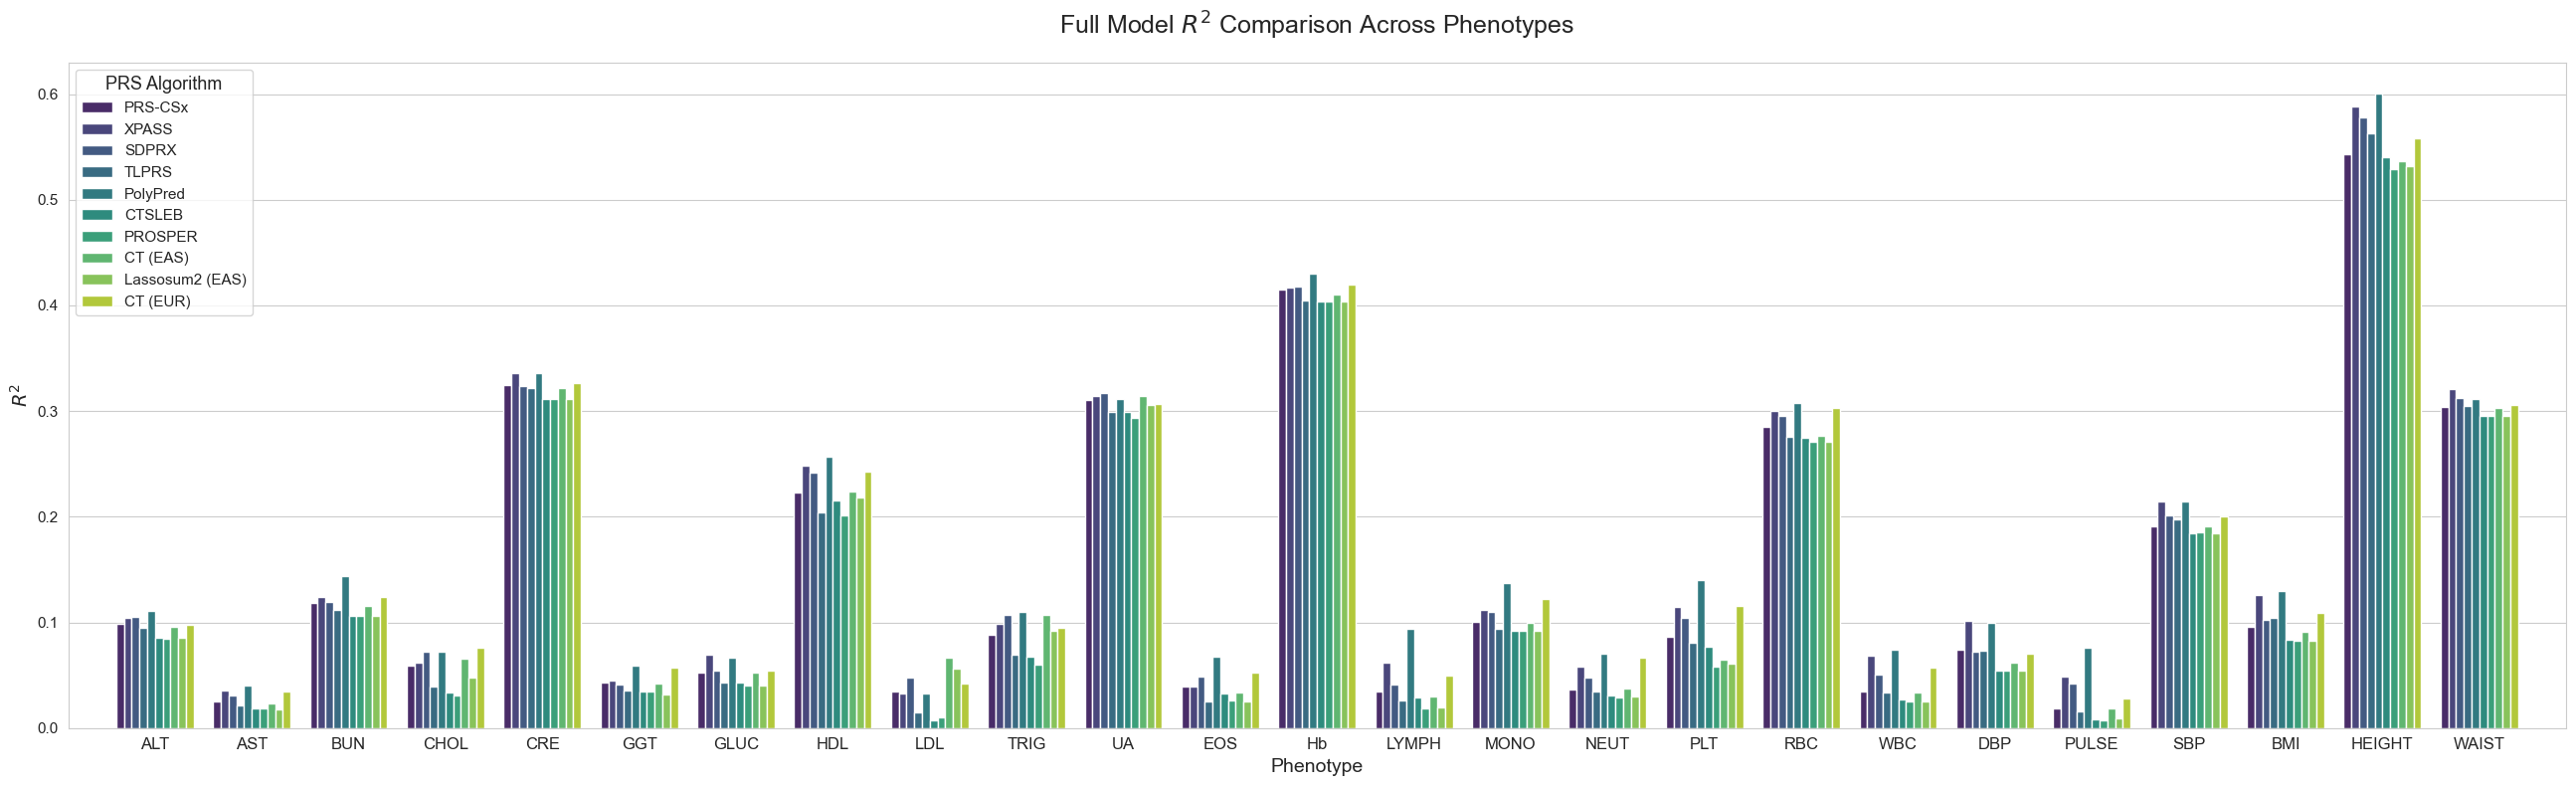

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# --- 1. 准备数据 ---
# 在您的实际应用中，您会从一个文件中加载计算好的结果
# 例如: df = pd.read_csv('my_prs_results.csv')
#
# 为了演示，我们这里创建一个模拟的DataFrame。
# 您的真实数据应该整理成下面这种“长格式”。

print("--- 用于绘图的模拟数据 ---")
print(merge_res.head())

# --- 2. 开始绘图 ---

# 设置绘图风格和字体，确保中文能够正确显示
sns.set_style("whitegrid")
# plt.rcParams['font.sans-serif'] = ['SimHei'] # 'SimHei' 是常用的黑体
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题
bar_width = 0.1

# 创建一个图形和坐标轴，设置合适的尺寸
# 分两行展示
fig, ax = plt.subplots(figsize=(26, 8))

barplot = sns.barplot(
    x='pheno',
    y='r2_full_median',
    hue='method',
    data=merge_res,
    palette='viridis',  # 'viridis', 'muted', 'colorblind' 都是不错的色板
    ax=ax,
    errorbar=None  # 不直接传递误差棒
)


# trait_order = merge_res.groupby('pheno')['r2_full_median'].mean().sort_values(ascending=False).index

# # 使用seaborn绘制分组柱状图
# # x: x轴类别 (表型)
# # y: y轴数值 (增量R²)
# # hue: 分组的类别 (方法)
# # data: 输入的DataFrame
# barplot = sns.barplot(
#     x='pheno',
#     y='r2_full_median',
#     hue='method',
#     data=merge_res,
#     palette='viridis',  # 'viridis', 'muted', 'colorblind' 都是不错的色板
#     ax=ax,
#     errorbar=None,  # 不直接传递误差棒
#     order=trait_order  # 按照平均R²排序
# )

# for patch in ax.patches:
#     # 获取当前的宽度
#     current_width = patch.get_width()
#     # 计算新旧宽度的差值
#     diff = current_width - bar_width
    
#     # 设置新的宽度
#     patch.set_width(bar_width)
    
#     # 重新计算x坐标，使条形保持在其分组的中心
#     patch.set_x(patch.get_x() + diff * 0.5)

# # --- 核心修正 ---
# # 2. 创建一个临时的、干净的DataFrame，专门用于匹配和绘图
# # 这个DataFrame的行数会和ax.patches的数量完全一致
# plot_data = merge_res[['pheno', 'method', 'r2_full_median', 'r2_full_CI_lower', 'r2_full_CI_upper']].dropna(subset=['r2_full_median']).copy()
# plot_data['err_lower'] = plot_data['r2_full_median'] - plot_data['r2_full_CI_lower']
# plot_data['err_upper'] = plot_data['r2_full_CI_upper'] - plot_data['r2_full_median']

# # 3. 排序这个临时DataFrame以匹配seaborn的绘图顺序
# x_order = [tick.get_text() for tick in ax.get_xticklabels()]
# hue_order = [t.get_text() for t in ax.get_legend().get_texts()]

# for x in x_order:
#     for hue in hue_order:
#         if not ((plot_data['pheno'] == x) & (plot_data['method'] == hue)).any():
#             # 如果没有对应的行，添加一个空行
#             plot_data = pd.concat([plot_data, pd.DataFrame({'pheno': [x], 'method': [hue], 'r2_full_median': [np.nan], 'r2_full_CI_lower': [np.nan], 'r2_full_CI_upper': [np.nan], 'err_lower': [np.nan], 'err_upper': [np.nan]})], ignore_index=True)

# plot_data['pheno'] = pd.Categorical(plot_data['pheno'], categories=x_order, ordered=True)
# plot_data['method'] = pd.Categorical(plot_data['method'], categories=hue_order, ordered=True)
# sorted_plot_data = plot_data.sort_values(by=['method', 'pheno'])
# print(sorted_plot_data.shape)
# print(len(ax.patches), len(sorted_plot_data))

# # 4. 现在zip是绝对安全的，因为len(ax.patches) == len(sorted_plot_data)
# for patch, (idx, row) in zip(ax.patches, sorted_plot_data.iterrows()):
#     x_center = patch.get_x() + patch.get_width() / 2
#     y_top = patch.get_height()
#     err = np.array([[row['err_lower']], [row['err_upper']]])

#     ax.errorbar(x=x_center, y=y_top, yerr=err,
#     fmt='none', c='black', capsize=1.5, elinewidth=1, alpha=0.4)

# --- 4. 美化与调整 ---

# 设置x轴的标签旋转角度，避免重叠
ax.set_xticklabels(ax.get_xticklabels(), ha='center')

# 对于不同的category，对x轴标签进行分组显示
# 这里假设您的DataFrame中有一个'category'列来区分不同
# 根据分组标签改变Y轴标签的颜色
# for label in ax.get_xticklabels():
#     trait_name = label.get_text()
#     # 根据类别设置标签颜色
#     category = merge_res.loc[merge_res['pheno'] == trait_name, 'category'].values[0]
#     label.set_color('#073B4C' if category == 'Blood biochemistry' else '#118AB2' if category == 'Body size measures' else '#E07A5F' if category == "Blood count" else "#EF476F" if category == "Blood pressure" else "#06D6A0")

# legend_elements = [
#     Line2D([0], [0], color='#073B4C', lw=4, label='Blood biochemistry'),
#     Line2D([0], [0], color='#118AB2', lw=4, label='Body size measures'),
#     Line2D([0], [0], color='#E07A5F', lw=4, label='Blood count'),
#     Line2D([0], [0], color='#EF476F', lw=4, label='Blood pressure'),
# ]
# ax.add_artist(ax.legend(handles=legend_elements, loc='upper right', fontsize=11, title='Trait Categories', title_fontsize='12', bbox_to_anchor=(1, 0.75)))
# 设置Y轴的格式，转为百分比显示更直观
# ax.set_yticklabels([f'{y*100:.1f}%' for y in ax.get_yticks()])


ax.set_title(r'Full Model $R^2$ Comparison Across Phenotypes', fontsize=18, pad=20)
ax.set_xlabel('Phenotype', fontsize=14)
ax.set_ylabel(r'$R^2$', fontsize=14)

# # 调整图例
# # 再加一张图例，显示不同的PRS算法
# legend_elements = [
#     Line2D([0], [0], color='blue', lw=4, label='PRS-CSx'),
#     Line2D([0], [0], color='orange', lw=4, label='XPASS'),
# ]
# ax.legend(handles=legend_elements, title='PRS Algorithm', fontsize=11, title_fontsize='13')
ax.legend(title='PRS Algorithm', title_fontsize='13', fontsize='11')

# 调整坐标轴刻度标签的字体大小
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=11)
ax.margins(x=0.02)

# 确保布局紧凑
plt.tight_layout()

# 保存图形（可选）
# plt.savefig('incremental_r2_comparison.png', dpi=300)

# 显示图形
plt.show()

--- 用于绘图的模拟数据 ---
     r2_incremental_median  r2_incremental_CI_lower  r2_incremental_CI_upper  \
8                 0.006303                 0.000994                 0.016568   
34                0.012593                 0.004561                 0.024348   
60                0.012123                 0.003681                 0.025064   
92                0.010290                 0.002458                 0.014747   
117               0.017269                 0.008248                 0.030479   

     r2_full_median  r2_full_CI_lower  r2_full_CI_upper  rmse_median  \
8          0.098602          0.071907          0.128952    14.053111   
34         0.104342          0.077269          0.134742    13.975426   
60         0.105502          0.078416          0.134776    14.016002   
92         0.094930          0.087097          0.099386    14.135488   
117        0.110420          0.085177          0.139716    13.927090   

     rmse_CI_lower  rmse_CI_upper  nrmse_mean_median  ...  \
8      

C:\Users\nancyli\AppData\Local\Temp\ipykernel_12800\918594925.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')


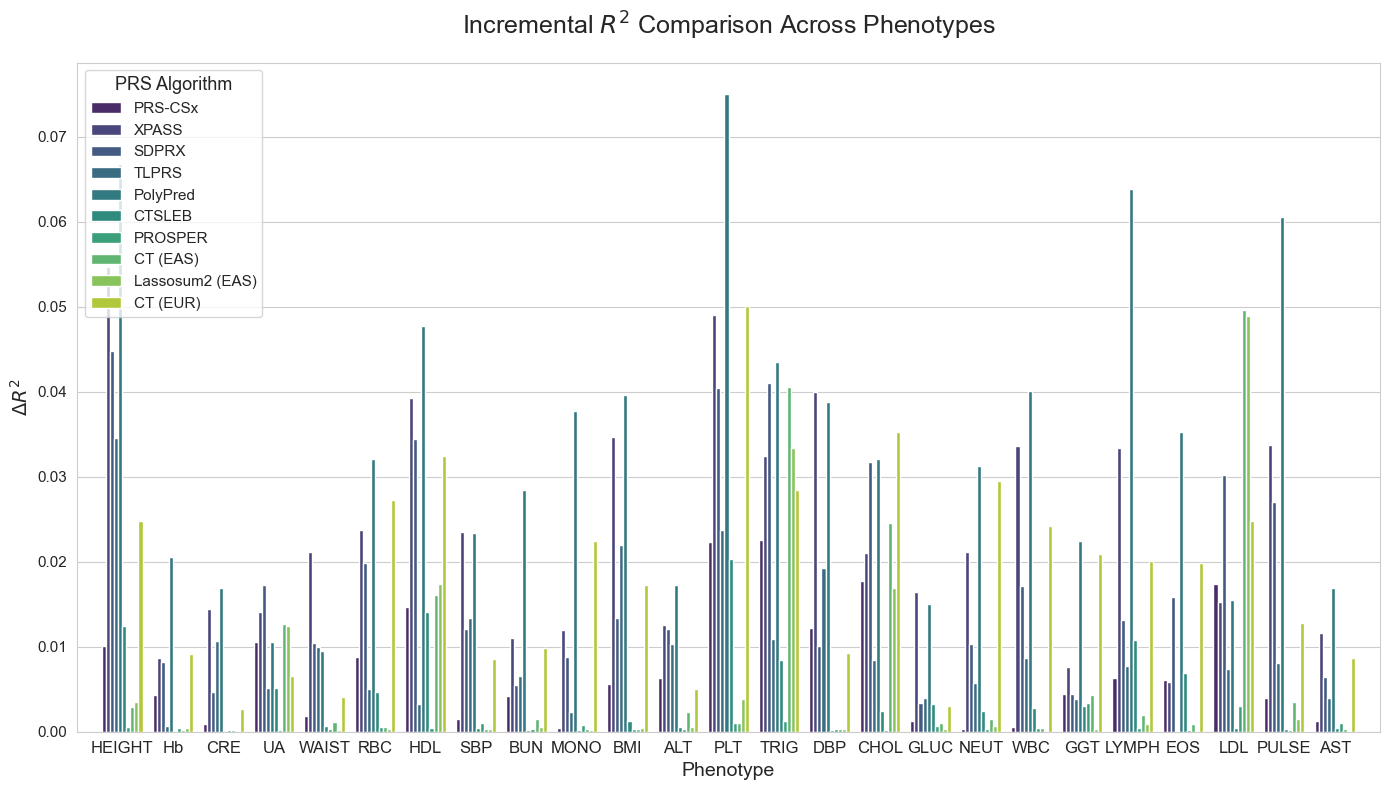

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# --- 1. 准备数据 ---
# 在您的实际应用中，您会从一个文件中加载计算好的结果
# 例如: df = pd.read_csv('my_prs_results.csv')
#
# 为了演示，我们这里创建一个模拟的DataFrame。
# 您的真实数据应该整理成下面这种“长格式”。

print("--- 用于绘图的模拟数据 ---")
print(merge_res.head())


# --- 2. 开始绘图 ---

# 设置绘图风格和字体，确保中文能够正确显示
sns.set_style("whitegrid")
# plt.rcParams['font.sans-serif'] = ['SimHei'] # 'SimHei' 是常用的黑体
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# 创建一个图形和坐标轴，设置合适的尺寸
fig, ax = plt.subplots(figsize=(14, 8))
trait_order = merge_res.groupby('pheno')['r2_full_median'].mean().sort_values(ascending=False).index

# 使用seaborn绘制分组柱状图
# x: x轴类别 (表型)
# y: y轴数值 (增量R²)
# hue: 分组的类别 (方法)
# data: 输入的DataFrame
barplot = sns.barplot(
    x='pheno',
    y='r2_incremental_median',
    hue='method',
    data=merge_res,
    # palette='viridis', # 'viridis', 'muted', 'colorblind' 都是不错的色板
    palette='viridis',
    ax=ax,
    # Seaborn 1.12.0+ 支持直接传入误差数据，但手动添加更灵活
    errorbar=None, # 关闭默认的误差棒
    order=trait_order  # 按照平均R²排序
)

# # --- 核心修正 ---
# # 2. 创建一个临时的、干净的DataFrame，专门用于匹配和绘图
# # 这个DataFrame的行数会和ax.patches的数量完全一致
# plot_data = merge_res[['pheno', 'method', 'r2_incremental_median', 'r2_incremental_CI_lower', 'r2_incremental_CI_upper']].dropna(subset=['r2_incremental_median']).copy()
# plot_data['err_lower'] = plot_data['r2_incremental_median'] - plot_data['r2_incremental_CI_lower']
# plot_data['err_upper'] = plot_data['r2_incremental_CI_upper'] - plot_data['r2_incremental_median']

# # 3. 排序这个临时DataFrame以匹配seaborn的绘图顺序
# x_order = [tick.get_text() for tick in ax.get_xticklabels()]
# hue_order = [t.get_text() for t in ax.get_legend().get_texts()]

# for x in x_order:
#     for hue in hue_order:
#         if not ((plot_data['pheno'] == x) & (plot_data['method'] == hue)).any():
#             # 如果没有对应的行，添加一个空行
#             plot_data = pd.concat([plot_data, pd.DataFrame({'pheno': [x], 'method': [hue], 'r2_incremental_median': [np.nan], 'r2_incremental_CI_lower': [np.nan], 'r2_incremental_CI_upper': [np.nan], 'err_lower': [np.nan], 'err_upper': [np.nan]})], ignore_index=True)

# plot_data['pheno'] = pd.Categorical(plot_data['pheno'], categories=x_order, ordered=True)
# plot_data['method'] = pd.Categorical(plot_data['method'], categories=hue_order, ordered=True)
# sorted_plot_data = plot_data.sort_values(by=['method', 'pheno'])
# print(sorted_plot_data.shape)
# print(len(ax.patches), len(sorted_plot_data))

# # 4. 现在zip是绝对安全的，因为len(ax.patches) == len(sorted_plot_data)
# for patch, (idx, row) in zip(ax.patches, sorted_plot_data.iterrows()):
#     x_center = patch.get_x() + patch.get_width() / 2
#     y_top = patch.get_height()
#     err = np.array([[row['err_lower']], [row['err_upper']]])

#     ax.errorbar(x=x_center, y=y_top, yerr=err,
#     fmt='none', c='black', capsize=1.5, elinewidth=1, alpha=0.4)

# --- 4. 美化与调整 ---

# 设置x轴的标签旋转角度，避免重叠
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# 对于不同的category，对x轴标签进行分组显示
# 这里假设您的DataFrame中有一个'category'列来区分不同
# # 根据分组标签改变Y轴标签的颜色
# for label in ax.get_xticklabels():
#     trait_name = label.get_text()
#     # 根据类别设置标签颜色
#     category = merge_res.loc[merge_res['pheno'] == trait_name, 'category'].values[0]
#     label.set_color('#073B4C' if category == 'Blood biochemistry' else '#118AB2' if category == 'Body size measures' else '#E07A5F' if category == "Blood count" else "#EF476F" if category == "Blood pressure" else "#06D6A0")

# legend_elements = [
#     Line2D([0], [0], color='#073B4C', lw=4, label='Blood biochemistry'),
#     Line2D([0], [0], color='#118AB2', lw=4, label='Body size measures'),
#     Line2D([0], [0], color='#E07A5F', lw=4, label='Blood count'),
#     Line2D([0], [0], color='#EF476F', lw=4, label='Blood pressure'),
# ]
# ax.add_artist(ax.legend(handles=legend_elements, loc='center right', fontsize=11, title='Trait Categories', title_fontsize='13', bbox_to_anchor=(1, 0.63)))
# 设置Y轴的格式，转为百分比显示更直观
# ax.set_yticklabels([f'{y*100:.1f}%' for y in ax.get_yticks()])


ax.set_title(r'Incremental $R^2$ Comparison Across Phenotypes', fontsize=18, pad=20)
ax.set_xlabel('Phenotype', fontsize=14)
ax.set_ylabel(r'$\Delta R^2$', fontsize=14)

# set y-axis label at the center


# # 调整图例
# # 再加一张图例，显示不同的PRS算法
# legend_elements = [
#     Line2D([0], [0], color='blue', lw=4, label='PRS-CSx'),
#     Line2D([0], [0], color='orange', lw=4, label='XPASS'),
# ]
# ax.legend(handles=legend_elements, title='PRS Algorithm', fontsize=11, title_fontsize='13')
ax.legend(title='PRS Algorithm', title_fontsize='13', fontsize='11', loc='upper left')

# 调整坐标轴刻度标签的字体大小
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=11)
ax.margins(x=0.02)

# 确保布局紧凑
plt.tight_layout()

# 保存图形（可选）
# plt.savefig('incremental_r2_comparison.png', dpi=300)

# 显示图形
plt.show()

--- 用于绘图的模拟数据 ---
     r2_incremental_median  r2_incremental_CI_lower  r2_incremental_CI_upper  \
8                 0.006303                 0.000994                 0.016568   
34                0.012593                 0.004561                 0.024348   
60                0.012123                 0.003681                 0.025064   
92                0.010290                 0.002458                 0.014747   
117               0.017592                 0.008177                 0.030986   

     r2_full_median  r2_full_CI_lower  r2_full_CI_upper  rmse_median  \
8          0.098602          0.071907          0.128952    14.053111   
34         0.104342          0.077269          0.134742    13.975426   
60         0.105502          0.078416          0.134776    14.016002   
92         0.094930          0.087097          0.099386    14.135488   
117        0.110035          0.083299          0.141595    13.844732   

     rmse_CI_lower  rmse_CI_upper  nrmse_mean_median  ...  \
8      

C:\Users\nancyli\AppData\Local\Temp\ipykernel_7652\3794693538.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


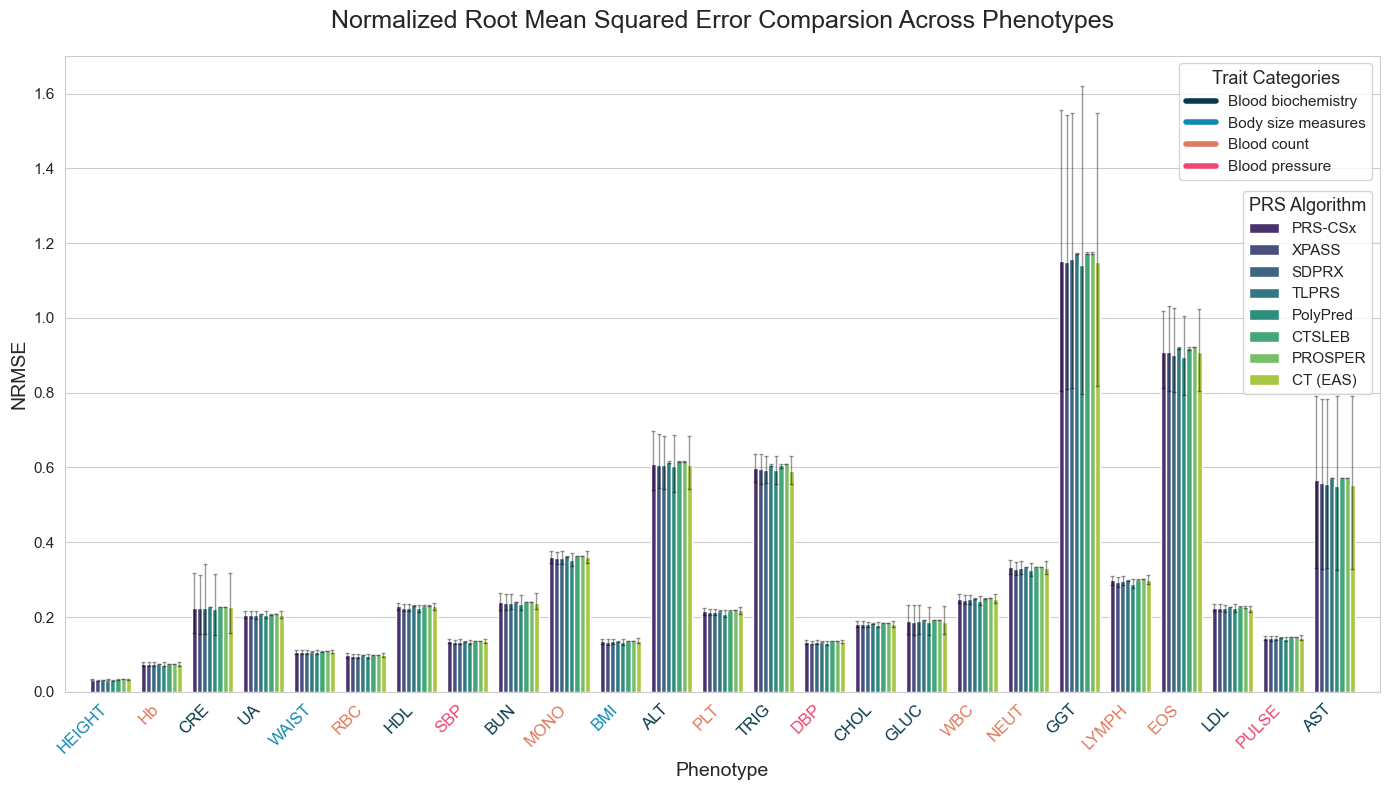

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# --- 1. 准备数据 ---
# 在您的实际应用中，您会从一个文件中加载计算好的结果
# 例如: df = pd.read_csv('my_prs_results.csv')
#
# 为了演示，我们这里创建一个模拟的DataFrame。
# 您的真实数据应该整理成下面这种“长格式”。

print("--- 用于绘图的模拟数据 ---")
print(merge_res.head())

trait_order = merge_res.groupby('pheno')['r2_full_median'].mean().sort_values(ascending=False).index



# --- 2. 开始绘图 ---

# 设置绘图风格和字体，确保中文能够正确显示
sns.set_style("whitegrid")
# plt.rcParams['font.sans-serif'] = ['SimHei'] # 'SimHei' 是常用的黑体
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# 创建一个图形和坐标轴，设置合适的尺寸
fig, ax = plt.subplots(figsize=(14, 8))

# 使用seaborn绘制分组柱状图
# x: x轴类别 (表型)
# y: y轴数值 (增量R²)
# hue: 分组的类别 (方法)
# data: 输入的DataFrame
barplot = sns.barplot(
x='pheno',
y='nrmse_mean_median',
hue='method',
data=merge_res,
palette='viridis', # 'viridis', 'muted', 'colorblind' 都是不错的色板
ax=ax,
# Seaborn 1.12.0+ 支持直接传入误差数据，但手动添加更灵活
# errorbar=None
order=trait_order  # 按照平均R²排序
)

# --- 核心修正 ---
# 2. 创建一个临时的、干净的DataFrame，专门用于匹配和绘图
# 这个DataFrame的行数会和ax.patches的数量完全一致
plot_data = merge_res[['pheno', 'method', 'nrmse_mean_median', 'nrmse_mean_CI_lower', 'nrmse_mean_CI_upper']].dropna(subset=['nrmse_mean_median']).copy()
plot_data['err_lower'] = plot_data['nrmse_mean_median'] - plot_data['nrmse_mean_CI_lower']
plot_data['err_upper'] = plot_data['nrmse_mean_CI_upper'] - plot_data['nrmse_mean_median']

# 3. 排序这个临时DataFrame以匹配seaborn的绘图顺序
x_order = [tick.get_text() for tick in ax.get_xticklabels()]
hue_order = [t.get_text() for t in ax.get_legend().get_texts()]

for x in x_order:
    for hue in hue_order:
        if not ((plot_data['pheno'] == x) & (plot_data['method'] == hue)).any():
            # 如果没有对应的行，添加一个空行
            plot_data = pd.concat([plot_data, pd.DataFrame({'pheno': [x], 'method': [hue], 'nrmse_mean_median': [np.nan], 'nrmse_mean_CI_lower': [np.nan], 'nrmse_mean_CI_upper': [np.nan], 'err_lower': [np.nan], 'err_upper': [np.nan]})], ignore_index=True)

plot_data['pheno'] = pd.Categorical(plot_data['pheno'], categories=x_order, ordered=True)
plot_data['method'] = pd.Categorical(plot_data['method'], categories=hue_order, ordered=True)
sorted_plot_data = plot_data.sort_values(by=['method', 'pheno'])
print(sorted_plot_data.shape)
print(len(ax.patches), len(sorted_plot_data))

# 4. 现在zip是绝对安全的，因为len(ax.patches) == len(sorted_plot_data)
for patch, (idx, row) in zip(ax.patches, sorted_plot_data.iterrows()):
    x_center = patch.get_x() + patch.get_width() / 2
    y_top = patch.get_height()
    err = np.array([[row['err_lower']], [row['err_upper']]])

    ax.errorbar(x=x_center, y=y_top, yerr=err,
    fmt='none', c='black', capsize=1.5, elinewidth=1, alpha=0.4)

# --- 4. 美化与调整 ---

# 设置x轴的标签旋转角度，避免重叠
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 对于不同的category，对x轴标签进行分组显示
# 这里假设您的DataFrame中有一个'category'列来区分不同
# 根据分组标签改变Y轴标签的颜色
for label in ax.get_xticklabels():
    trait_name = label.get_text()
    # 根据类别设置标签颜色
    category = merge_res.loc[merge_res['pheno'] == trait_name, 'category'].values[0]
    label.set_color('#073B4C' if category == 'Blood biochemistry' else '#118AB2' if category == 'Body size measures' else '#E07A5F' if category == "Blood count" else "#EF476F" if category == "Blood pressure" else "#06D6A0")

legend_elements = [
    Line2D([0], [0], color='#073B4C', lw=4, label='Blood biochemistry'),
    Line2D([0], [0], color='#118AB2', lw=4, label='Body size measures'),
    Line2D([0], [0], color='#E07A5F', lw=4, label='Blood count'),
    Line2D([0], [0], color='#EF476F', lw=4, label='Blood pressure'),
]
ax.add_artist(ax.legend(handles=legend_elements, loc='upper right', fontsize=11, title='Trait Categories', title_fontsize='13'))
# 设置Y轴的格式，转为百分比显示更直观
# ax.set_yticklabels([f'{y*100:.1f}%' for y in ax.get_yticks()])


ax.set_title(r'Normalized Root Mean Squared Error Comparsion Across Phenotypes', fontsize=18, pad=20)
ax.set_xlabel('Phenotype', fontsize=14)
ax.set_ylabel(r'NRMSE', fontsize=14)

# # 调整图例
# # 再加一张图例，显示不同的PRS算法
# legend_elements = [
#     Line2D([0], [0], color='blue', lw=4, label='PRS-CSx'),
#     Line2D([0], [0], color='orange', lw=4, label='XPASS'),
# ]
# ax.legend(handles=legend_elements, title='PRS Algorithm', fontsize=11, title_fontsize='13')
ax.legend(title='PRS Algorithm', title_fontsize='13',loc='upper right', fontsize='11', bbox_to_anchor=(1, 0.80))

# 调整坐标轴刻度标签的字体大小
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=11)
ax.margins(x=0.02)

# 确保布局紧凑
plt.tight_layout()

# 保存图形（可选）
# plt.savefig('incremental_r2_comparison.png', dpi=300)

# 显示图形
plt.show()

--- 您的原始数据格式 (模拟) ---
     r2_incremental_median  r2_incremental_CI_lower  r2_incremental_CI_upper  \
8                 0.006303                 0.000994                 0.016568   
34                0.012593                 0.004561                 0.024348   
60                0.012123                 0.003681                 0.025064   
92                0.010290                 0.002458                 0.014747   
117               0.017592                 0.008177                 0.030986   

     r2_full_median  r2_full_CI_lower  r2_full_CI_upper  rmse_median  \
8          0.098602          0.071907          0.128952    14.053111   
34         0.104342          0.077269          0.134742    13.975426   
60         0.105502          0.078416          0.134776    14.016002   
92         0.094930          0.087097          0.099386    14.135488   
117        0.110035          0.083299          0.141595    13.844732   

     rmse_CI_lower  rmse_CI_upper  nrmse_mean_median  ...  \
8  

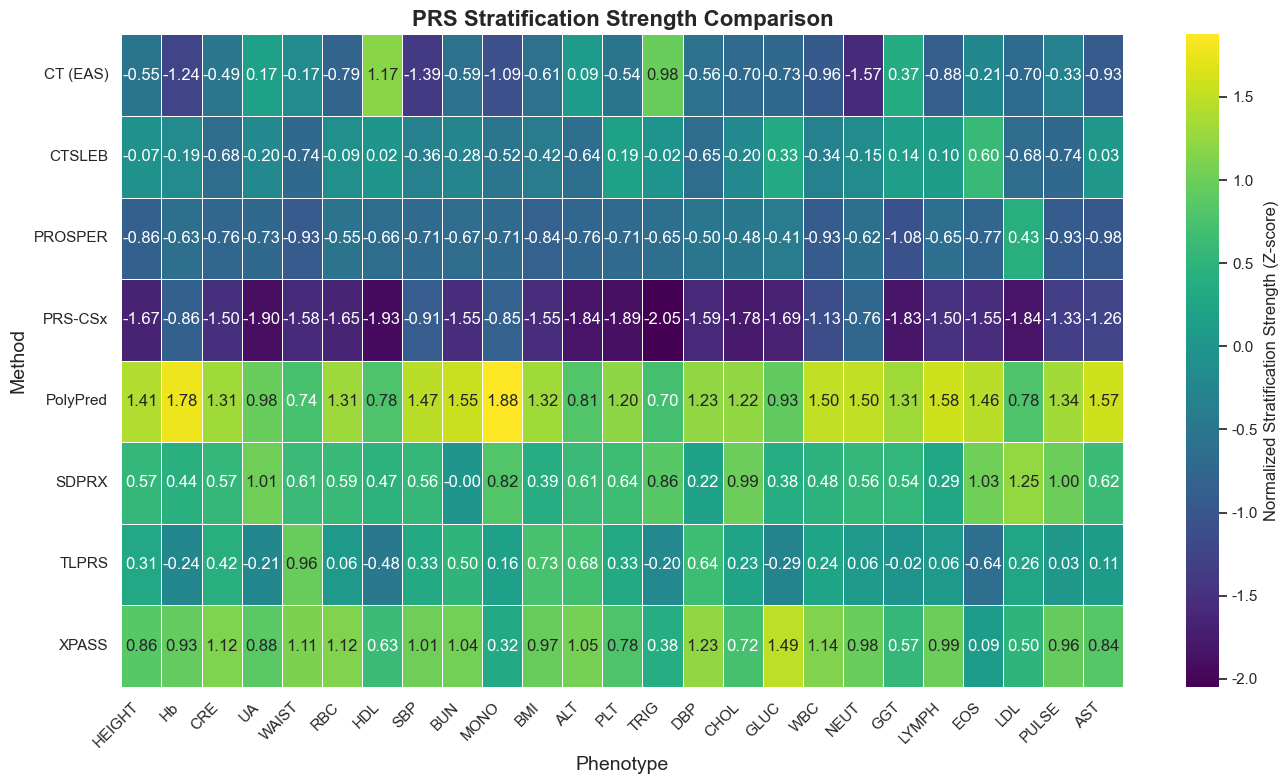

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. 用户数据准备 ---
# 请将您的数据加载到名为 user_df 的DataFrame中。
# 下面我将创建一个与您描述完全一致的模拟DataFrame，以便代码能直接运行。
# 您使用时，请删除或注释掉这部分，并加载您自己的数据。

print("--- 您的原始数据格式 (模拟) ---")
print(merge_res.head())


# --- 2. 核心分析与绘图流程 ---

# a. 计算分层强度指标 (顶层 - 底层)
# 使用 .copy() 避免 SettingWithCopyWarning
df_processed = merge_res.copy()
df_processed['stratification_diff'] = df_processed['top_quintile_mean_median'] - df_processed['bottom_quintile_mean_median']

# b. 对计算出的差值进行Z-score标准化 (在每个性状'pheno'内部进行)
# 这是为了让不同性状的颜色具有可比性，是本分析最关键的步骤之一。
df_processed['normalized_diff'] = df_processed.groupby('pheno')['stratification_diff'].transform(
lambda x: (x - x.mean()) / x.std()
)

# c. 将数据转换为适合热图的矩阵格式
# 行是算法(method)，列是性状(pheno)
heatmap_data = df_processed.pivot_table(
index='method',
columns='pheno',
values='normalized_diff' # 使用标准化后的差值作为热图颜色
)

print("\n--- 用于绘制热图的矩阵数据 (值为标准化后的分层强度) ---")
print(heatmap_data)


# d. 绘制热图
plt.figure(figsize=(14, 8))
sns.set_theme(style="white")

# 按照trait_order重新排列列顺序
heatmap_data = heatmap_data.reindex(columns=trait_order)

sns.heatmap(
    heatmap_data,
    annot=True, # 在单元格中显示数值
    fmt=".2f", # 格式化数值为两位小数
    cmap='viridis', # 颜色映射，您可以选择其他色板如 'viridis', 'plasma', 'magma' 等
    linewidths=.5,
    linecolor='white',
    cbar_kws={"label": "Normalized Stratification Strength (Z-score)"}
)

# 设置标题和标签
plt.title('PRS Stratification Strength Comparison', fontsize=16, weight='bold')
plt.xlabel('Phenotype', fontsize=14)
plt.ylabel('Method', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# 保存图像
plt.tight_layout()
plt.show()